## On nettoie le corpus

In [1]:
import os
import re
from langdetect import detect  

# Chemin vers le dossier contenant les fichiers texte
dossier_corpus = "/Users/chloe/Downloads/Linguistique_corpus/"

# Fonction pour nettoyer un texte tout en conservant les accents
def nettoyer_texte(texte):
    # Suppression des caractères spéciaux et URLs (conserve les accents)
    texte = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^a-zA-ZÀ-ÿ\s]', ' ', texte)
    # Conversion en minuscule
    texte = texte.lower()
    # Détection de langue
    try:
        langue = detect(texte)
    except Exception as e:
        print(f"Erreur de détection de langue : {e}")
        return None, None

    # Retourner le texte et la langue détectée
    return texte, langue

# Charger les fichiers du corpus et nettoyer
corpus_nettoyé = []
for root, dirs, files in os.walk(dossier_corpus):
    for fichier in files:
        if fichier.endswith(".txt"):  # Vérifie uniquement les fichiers texte
            chemin_fichier = os.path.join(root, fichier)
            try:
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    texte_nettoyé, langue = nettoyer_texte(texte)
                    if texte_nettoyé and langue in ['fr', 'en']:  # Conserver les textes en français ou anglais
                        corpus_nettoyé.append((fichier, texte_nettoyé, langue))
            except Exception as e:
                print(f"Erreur lors de la lecture de {fichier}: {e}")

# Affichage propre des exemples
print("Exemples de textes nettoyés :\n")
for i, (fichier, texte, langue) in enumerate(corpus_nettoyé[:10], 1):  # Limite à 10 exemples
    print(f"--- Exemple {i} ---\n")
    print(f"Fichier : {fichier}")
    print(f"Langue détectée : {langue}")
    print(texte[:1000])  # Affiche les 1000 premiers caractères pour limiter la longueur
    print("\n")

Exemples de textes nettoyés :

--- Exemple 1 ---

Fichier : Nevertheless_Machiavelli.txt
Langue détectée : en
nevertheless  machiavelli  pascal by carlo ginzburg 

 therefore machiavelli had nothing to do with casuistry  while quadri is a sloppy  superficial scholar  he does deserve recognition for having grasped in the revised and expanded edition of his own book  which was different from the one criticized by croce the significance of a book where machiavelli s name is never mentioned  alessandro bonucci s la derogabilità del diritto naturale nella scolastica        roughly   exceptions to natural law in scholasticism   most of the medieval debates analysed by bonucci revolve around passages from the bible  moses  for instance  is said to have allowed repudiation of a first wife and remarriage  on the basis of the principle permisit fieri mala  ne fierent peiora   he permitted the bad in order to avoid something worse    in his quaestiones mercuriales  as bonucci noted  giovanni d an

## On commence par analyser la fréquence des connecteurs en anglais dans tous les textes, tous genres confondus

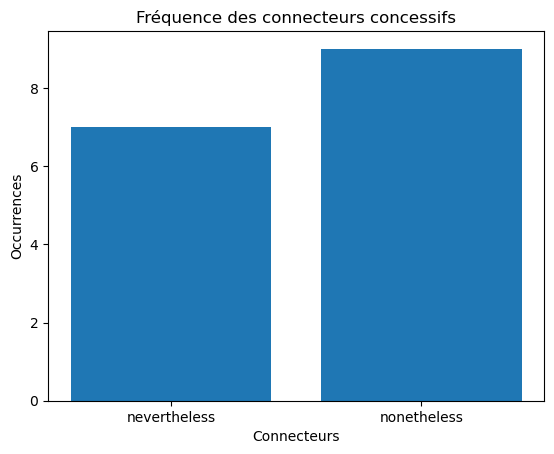

In [2]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("en_core_web_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['nevertheless', 'nonetheless']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## On fait la même chose en français

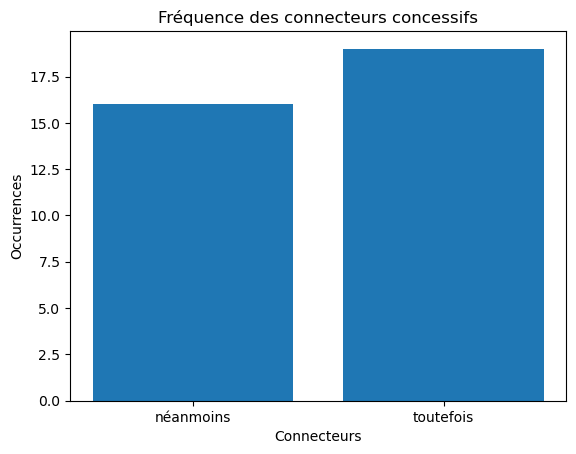

In [3]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (français)
nlp = spacy.load("fr_core_news_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['néanmoins', 'toutefois']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## On analyse la fréquence des connecteurs en anglais dans le corpus de littérature

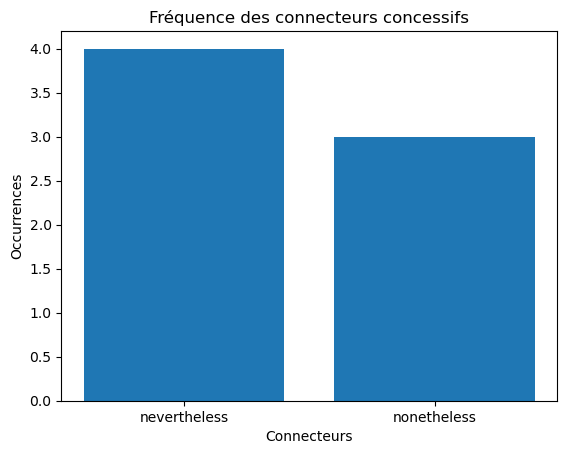

In [4]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("en_core_web_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Litterature"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['nevertheless', 'nonetheless']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## Même chose pour le français

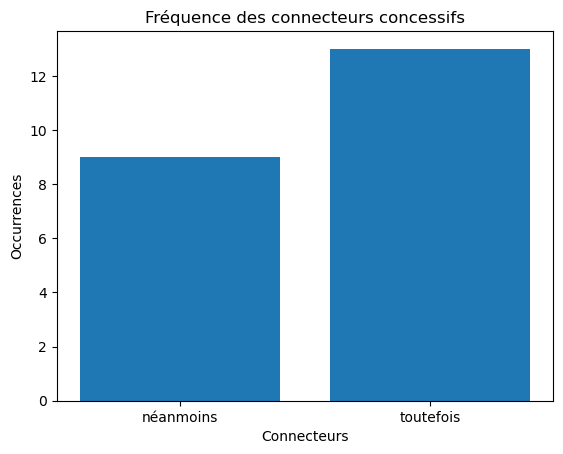

In [5]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (français)
nlp = spacy.load("fr_core_news_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Litterature"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['néanmoins', 'toutefois']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## On analyse la fréquence des connecteurs en anglais dans le corpus de presse

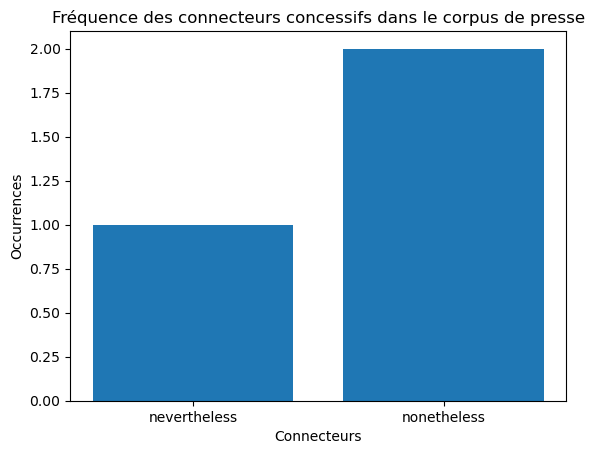

In [6]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("en_core_web_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Presse"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['nevertheless', 'nonetheless']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs dans le corpus de presse')
plt.show()


## Même chose pour le français

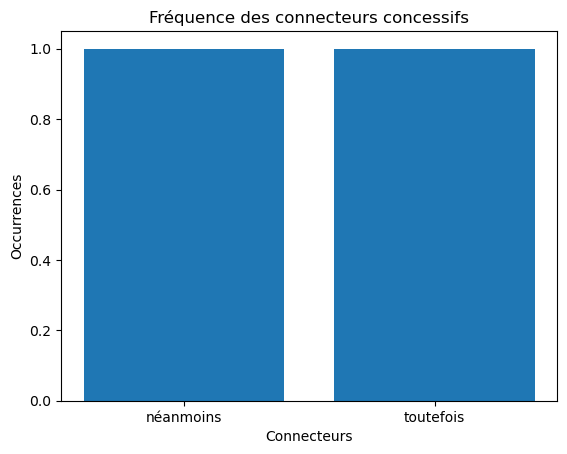

In [7]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("fr_core_news_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Presse"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['néanmoins', 'toutefois']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## On analyse la fréquence des connecteurs en anglais pour le corpus juridique

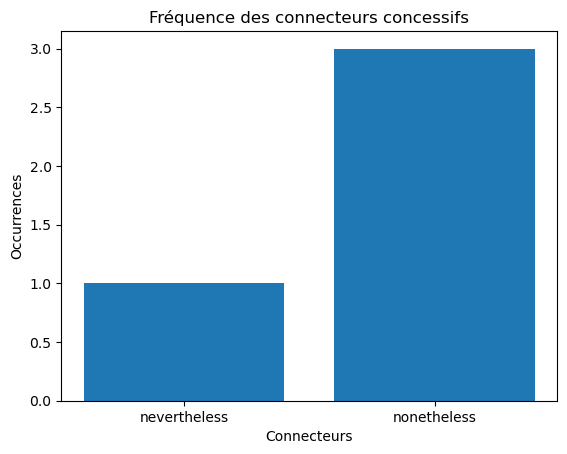

In [8]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("en_core_web_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Juridique"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['nevertheless', 'nonetheless']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## Même chose pour le français

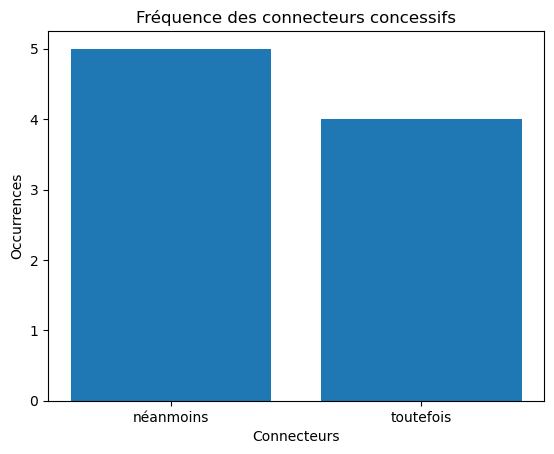

In [9]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("fr_core_news_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Juridique"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['néanmoins', 'toutefois']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs')
plt.show()


## On analyse la fréquence des connecteurs en anglais dans le corpus de tweets

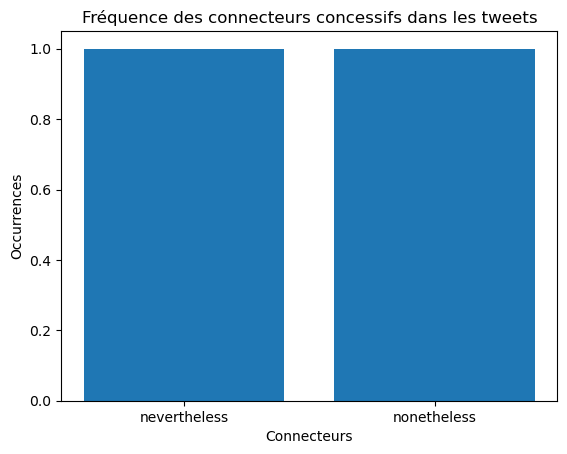

In [10]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("en_core_web_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Tweets"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['nevertheless', 'nonetheless']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs dans les tweets')
plt.show()


## Même chose en français

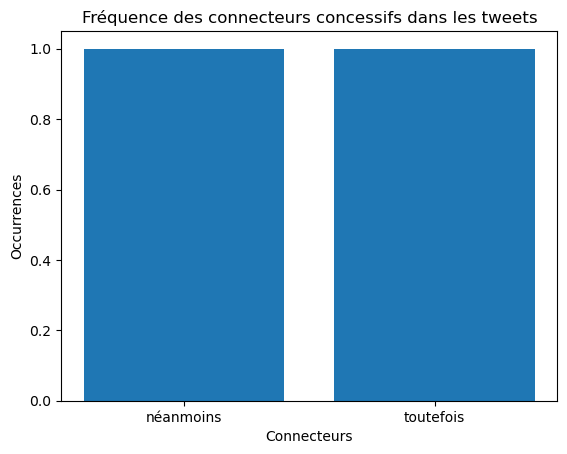

In [11]:
import os
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Charger le modèle SpaCy (anglais)
nlp = spacy.load("fr_core_news_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/Tweets"

# Parcourir tous les sous-dossiers et fichiers
data = []
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
            try:
                # Lecture du contenu du fichier
                chemin_fichier = os.path.join(root, fichier)
                with open(chemin_fichier, 'r', encoding='utf-8') as f:
                    texte = f.read()
                    data.append({'fichier': fichier, 'texte': texte})
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si des fichiers ont été lus
if not data:
    print(f"Aucun fichier texte trouvé dans le dossier '{dossier}' et ses sous-dossiers.")
    exit()

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Vérifier si la colonne 'texte' est bien présente
if 'texte' not in df.columns:
    print("La colonne 'texte' est absente. Vérifiez les fichiers.")
    exit()

# Assurez-vous que les données de la colonne 'texte' sont bien des chaînes de caractères
df['texte'] = df['texte'].astype(str)

# Fonction pour compter les connecteurs dans un texte avec lemmatisation et suppression des majuscules
def compter_connecteurs(texte):
    doc = nlp(texte)  # Analyse avec SpaCy
    connecteurs = ['néanmoins', 'toutefois']
    # Utilisation de lemmatisation et conversion en minuscules
    compte = Counter([token.lemma_.lower() for token in doc])
    return {c: compte[c] for c in connecteurs}

# Appliquer la fonction à chaque texte dans le DataFrame
df['connecteurs'] = df['texte'].apply(compter_connecteurs)

# Agrégation des résultats
resultats = df['connecteurs'].apply(pd.Series).sum().reset_index()
resultats.columns = ['Connecteur', 'Occurrences']

# Visualisation
plt.bar(resultats['Connecteur'], resultats['Occurrences'])
plt.xlabel('Connecteurs')
plt.ylabel('Occurrences')
plt.title('Fréquence des connecteurs concessifs dans les tweets')
plt.show()


## On fait un nuage de mots pour tous les mots qui entourent "néanmoins"

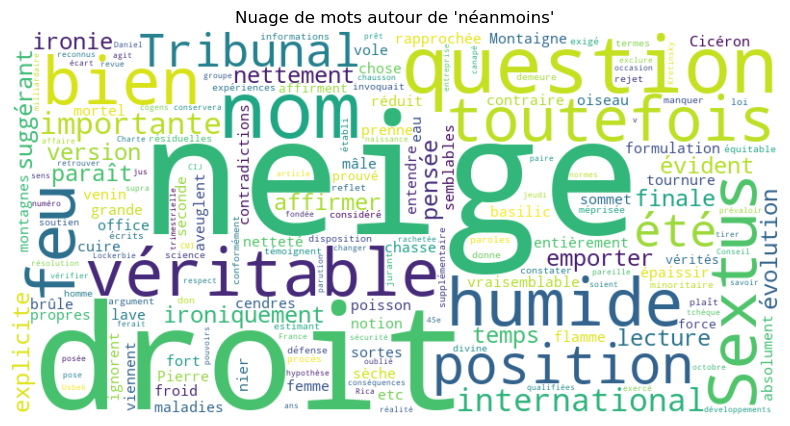

In [ ]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from langdetect import detect

# Charger le modèle SpaCy pour la langue correspondante
nlp = spacy.load("fr_core_news_sm")  # Français

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/"

# Lire tout le contenu des fichiers texte
texte_complet = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    texte_complet += f.read() + " "  # Ajouter un espace entre les fichiers
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Filtrer les phrases en français uniquement
texte_fr = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    contenu = f.read()
                    if detect(contenu) == 'fr':  # Vérifie si le texte est en français
                        texte_fr += contenu + " "
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si le texte en français est vide
if not texte_fr.strip():
    print("Aucun texte en français trouvé dans le dossier.")
    exit()

# Traiter le texte français avec spaCy
mots_autour = [
    token.text.lower() for token in nlp(texte_fr)
    if not token.is_stop and not token.is_punct
    and token.text.lower() != connecteur
    and connecteur in token.sent.text.lower()
]

# Vérifiez si le texte est vide
if not texte_complet.strip():
    print("Aucun texte valide trouvé dans le dossier.")
    exit()

# Générer un nuage de mots autour d'un connecteur spécifique
connecteur = 'néanmoins'
mots_autour = [
    token.text for token in nlp(texte_complet)
    if not token.is_stop and not token.is_punct
    if token.text.lower() != connecteur and connecteur in token.sent.text.lower()
]

# Créer et afficher le nuage de mots
nuage = WordCloud(width=800, height=400, background_color='white').generate(' '.join(mots_autour))

plt.figure(figsize=(10, 5))
plt.imshow(nuage, interpolation='bilinear')
plt.axis('off')
plt.title(f"Nuage de mots autour de '{connecteur}'")
plt.show()

## Même chose pour "toutefois"

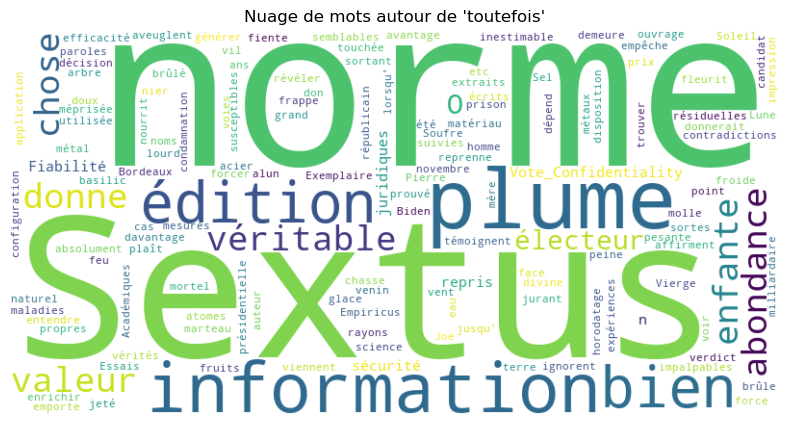

In [ ]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from langdetect import detect

# Charger le modèle SpaCy pour la langue correspondante
nlp = spacy.load("fr_core_news_sm")  # Français

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/"

# Lire tout le contenu des fichiers texte
texte_complet = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    texte_complet += f.read() + " "  # Ajouter un espace entre les fichiers
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Filtrer les phrases en français uniquement
texte_fr = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    contenu = f.read()
                    if detect(contenu) == 'fr':  # Vérifie si le texte est en français
                        texte_fr += contenu + " "
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si le texte en français est vide
if not texte_fr.strip():
    print("Aucun texte en français trouvé dans le dossier.")
    exit()

# Traiter le texte français avec spaCy
mots_autour = [
    token.text.lower() for token in nlp(texte_fr)
    if not token.is_stop and not token.is_punct
    and token.text.lower() != connecteur
    and connecteur in token.sent.text.lower()
]

# Vérifiez si le texte est vide
if not texte_complet.strip():
    print("Aucun texte valide trouvé dans le dossier.")
    exit()

# Générer un nuage de mots autour d'un connecteur spécifique
connecteur = 'toutefois'
mots_autour = [
    token.text for token in nlp(texte_complet)
    if not token.is_stop and not token.is_punct
    if token.text.lower() != connecteur and connecteur in token.sent.text.lower()
]

# Créer et afficher le nuage de mots
nuage = WordCloud(width=800, height=400, background_color='white').generate(' '.join(mots_autour))

plt.figure(figsize=(10, 5))
plt.imshow(nuage, interpolation='bilinear')
plt.axis('off')
plt.title(f"Nuage de mots autour de '{connecteur}'")
plt.show()

## Pour le corpus anglais on fait un nuage de mots pour tous les mots qui entourent "nevertheless"

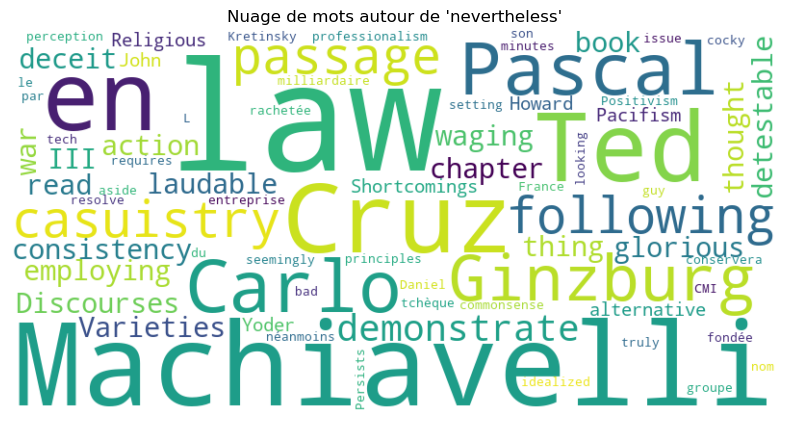

In [24]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from langdetect import detect

# Charger le modèle SpaCy pour la langue correspondante
nlp = spacy.load("en_core_web_sm")  # Anglais

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/"

# Lire tout le contenu des fichiers texte
texte_complet = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    texte_complet += f.read() + " "  # Ajouter un espace entre les fichiers
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Filtrer les phrases en français uniquement
texte_en = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    contenu = f.read()
                    if detect(contenu) == 'fr':  # Vérifie si le texte est en français
                        texte_en += contenu + " "
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si le texte en français est vide
if not texte_en.strip():
    print("Aucun texte en français trouvé dans le dossier.")
    exit()

# Traiter le texte français avec spaCy
mots_autour = [
    token.text.lower() for token in nlp(texte_en)
    if not token.is_stop and not token.is_punct
    and token.text.lower() != connecteur
    and connecteur in token.sent.text.lower()
]

# Vérifiez si le texte est vide
if not texte_complet.strip():
    print("Aucun texte valide trouvé dans le dossier.")
    exit()

# Générer un nuage de mots autour d'un connecteur spécifique
connecteur = 'nevertheless'
mots_autour = [
    token.text for token in nlp(texte_complet)
    if not token.is_stop and not token.is_punct
    if token.text.lower() != connecteur and connecteur in token.sent.text.lower()
]

# Créer et afficher le nuage de mots
nuage = WordCloud(width=800, height=400, background_color='white').generate(' '.join(mots_autour))

plt.figure(figsize=(10, 5))
plt.imshow(nuage, interpolation='bilinear')
plt.axis('off')
plt.title(f"Nuage de mots autour de '{connecteur}'")
plt.show()

## Même chose pour nonetheless

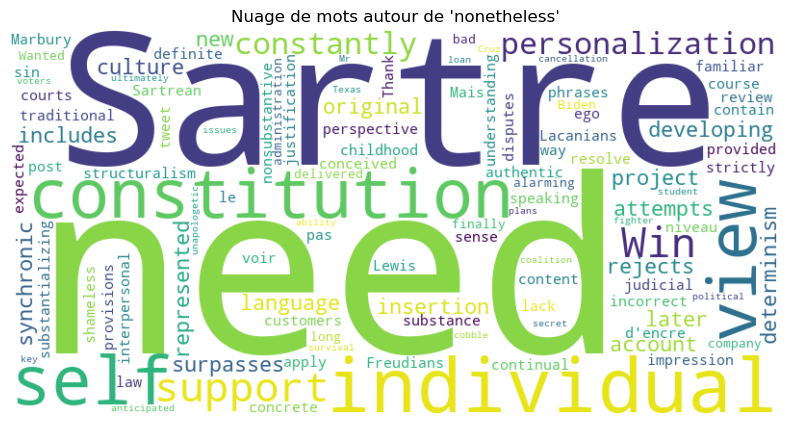

In [25]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from langdetect import detect

# Charger le modèle SpaCy pour la langue correspondante
nlp = spacy.load("en_core_web_sm")  # Anglais

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/"

# Lire tout le contenu des fichiers texte
texte_complet = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    texte_complet += f.read() + " "  # Ajouter un espace entre les fichiers
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Filtrer les phrases en français uniquement
texte_en = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    contenu = f.read()
                    if detect(contenu) == 'fr':  # Vérifie si le texte est en français
                        texte_en += contenu + " "
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Vérifiez si le texte en français est vide
if not texte_en.strip():
    print("Aucun texte en français trouvé dans le dossier.")
    exit()

# Traiter le texte français avec spaCy
mots_autour = [
    token.text.lower() for token in nlp(texte_en)
    if not token.is_stop and not token.is_punct
    and token.text.lower() != connecteur
    and connecteur in token.sent.text.lower()
]

# Vérifiez si le texte est vide
if not texte_complet.strip():
    print("Aucun texte valide trouvé dans le dossier.")
    exit()

# Générer un nuage de mots autour d'un connecteur spécifique
connecteur = 'nonetheless'
mots_autour = [
    token.text for token in nlp(texte_complet)
    if not token.is_stop and not token.is_punct
    if token.text.lower() != connecteur and connecteur in token.sent.text.lower()
]

# Créer et afficher le nuage de mots
nuage = WordCloud(width=800, height=400, background_color='white').generate(' '.join(mots_autour))

plt.figure(figsize=(10, 5))
plt.imshow(nuage, interpolation='bilinear')
plt.axis('off')
plt.title(f"Nuage de mots autour de '{connecteur}'")
plt.show()

## On analyse les collocations pour tous les connecteurs dans les deux langues

In [16]:
from collections import defaultdict
from collections import Counter
import spacy 
import os

# Charger le modèle SpaCy pour la langue correspondante
nlp = spacy.load("fr_core_news_sm")  # Français
nlp = spacy.load("en_core_web_sm")

# Dossier contenant les fichiers texte
dossier = "/Users/chloe/Downloads/Linguistique_corpus/"

texte_complet = ""
for root, dirs, files in os.walk(dossier):
    for fichier in files:
        if fichier.endswith('.txt'):
            try:
                with open(os.path.join(root, fichier), 'r', encoding='utf-8') as f:
                    texte_complet += f.read() + " "  # Ajouter un espace entre les fichiers
            except Exception as e:
                print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

connecteurs = ['néanmoins', 'toutefois', 'nonetheless', 'nevertheless']
window_size = 3  # Nombre de mots autour

# Vérifiez si du texte a été chargé
if not texte_complet.strip():
    print("Aucun texte n'a été trouvé ou chargé. Vérifiez vos fichiers.")
else:
    # Trouver les collocations
    collocations = defaultdict(list)
    doc = nlp(texte_complet)  # Utilisez le texte concaténé ici

    for token in doc:
        if token.text.lower() in connecteurs:
            start = max(0, token.i - window_size)
            end = min(len(doc), token.i + window_size + 1)
            collocations[token.text.lower()].extend([t.text for t in doc[start:end] if t != token])

    # Afficher les collocations
    for connecteur, mots in collocations.items():
        print(f"Collocations pour {connecteur}: {Counter(mots)}")

Collocations pour nevertheless: Counter({',': 5, '.': 3, 'is': 2, 'a': 2, 'there': 2, 'MACHIAVELLI': 1, '(': 1, 'it': 1, 'laudable': 1, 'Lacanians': 1, '\n \n': 1, ':': 1, 'The': 1, 'Varieties': 1, 'Yoder': 1, ')': 1, '\n\n': 1, 'bad': 1, 'laws': 1, 'are': 1, 'laws”—requires': 1, 'setting': 1, 'aside': 1, 'their': 1, 'company': 1, "'s": 1, 'to': 1, 'vote': 1, 'Ted': 1, 'Cruz': 1})
Collocations pour toutefois: Counter({',': 11, 'et': 10, '.': 5, 'est': 5, 'qui': 4, 'il': 3, 'les': 2, 'ce': 2, "n'est": 2, 'que': 2, 'enfante': 2, 'le': 2, 'telles': 2, 'pas': 2, 'Il': 2, 'aussi': 2, 'repris': 2, 'dans': 2, 'mais': 1, 'donnerait': 1, 'un': 1, 'avantage': 1, 'à': 1, 'Académiques': 1, 'entre': 1, 'la': 1, 'qu’elle': 1, 'représente': 1, 'inestimable': 1, 'impalpables': 1, 'doux': 1, 'touchée': 1, 'Soufre': 1, "c'est": 1, 'une': 1, 'glace': 1, 'brûlé': 1, 'lequel': 1, 'fleurit': 1, "lorsqu'on": 1, "qu'un": 1, 'lourd': 1, 'plume': 1, 'emporte': 1, 'plus': 1, 'pesante': 1, 'basilic': 1, 'chasse':

## On code un algorithme de classification pour connaître le contexte dans lequel les différents connecteurs sont employés

In [17]:
import os
import spacy

# Charger le modèle SpaCy
nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("fr_core_news_sm")

# Liste des connecteurs concessifs
connecteurs = ["nevertheless", "nonetheless", "néanmoins", "toutefois"]

# Dossier contenant les fichiers texte de votre corpus
dossier_corpus = "/Users/chloe/Downloads/Linguistique_corpus/"

# Fonction pour lire les fichiers texte depuis un dossier
def charger_corpus(dossier):
    textes = []
    for root, dirs, files in os.walk(dossier):
        for fichier in files:
            if fichier.endswith('.txt'):  # Vérifie uniquement les fichiers .txt
                chemin_fichier = os.path.join(root, fichier)
                try:
                    with open(chemin_fichier, 'r', encoding='utf-8') as f:
                        textes.append(f.read())
                except Exception as e:
                    print(f"Erreur lors de la lecture de {fichier} : {e}")
    return textes

# Fonction pour extraire les phrases contenant les connecteurs
def extraire_phrases(texte, connecteurs):
    doc = nlp(texte)
    phrases_contexte = []
    for sent in doc.sents:
        if any(c in sent.text.lower() for c in connecteurs):
            phrases_contexte.append(sent.text)
    return phrases_contexte

def classifier_par_regles(phrase, connecteur):
    """
    Classifie une phrase contenant un connecteur selon trois contextes principaux :
    - "Concession simple"
    - "Atténuation d'une contradiction"
    - "Contexte neutre"
    """
    phrase_lower = phrase.lower()

    # Règles pour "Atténuation d'une contradiction"
    if any(kw in phrase_lower for kw in [
        "malgré", "en dépit de", "bien que", "quoique", "alors que", 
        "tandis que", "tout en étant", "pour autant", "soutien", "invoque", "position", "argument", "démontrer", "preuve", "affirmation", "doute", "contradiction", "malgré", "conflit"
    ]):
        return "Atténuation d'une contradiction"

    # Règles pour "Concession simple"
    elif any(kw in phrase_lower for kw in ["mais", "toutefois", "cependant", "pourtant"]):
        return "Concession explicite"

    # Par défaut, "Contexte neutre"
    else:
        return "Concession stylistique"

# Fonction pour extraire et classifier les phrases d'un texte
def extraire_et_classifier_phrases(texte, connecteurs):
    doc = nlp(texte)
    resultats = []
    for sent in doc.sents:
        for connecteur in connecteurs:
            if connecteur in sent.text.lower():
                categorie = classifier_par_regles(sent.text, connecteur)
                resultats.append({"Phrase": sent.text, "Connecteur": connecteur, "Catégorie": categorie})
    return resultats

# Charger les textes du corpus
textes = charger_corpus(dossier_corpus)

# Vérifier si des textes ont été trouvés
if not textes:
    print("Aucun fichier texte trouvé dans le dossier donné.")
else:
    contextes_global = []
    for texte in textes:
        contextes_global.extend(extraire_et_classifier_phrases(texte, connecteurs))

    # Affichage des résultats
    if contextes_global:
        print("\n=== Résultats de la classification ===\n")
        for resultat in contextes_global:
            print(f"Phrase : {resultat['Phrase']}")
            print(f"Connecteur : {resultat['Connecteur']}")
            print(f"Catégorie : {resultat['Catégorie']}\n")
    else:
        print("Aucune phrase contenant les connecteurs n'a été trouvée.")


=== Résultats de la classification ===

Phrase : NEVERTHELESS
Connecteur : nevertheless
Catégorie : Concession stylistique

Phrase : it is, nevertheless, a laudable and glorious thing.
Connecteur : nevertheless
Catégorie : Concession stylistique

Phrase : que Sextus n’a pas (mais qui donnerait toutefois un avantage à Sextus !)
Connecteur : toutefois
Catégorie : Concession explicite

Phrase : Néanmoins, il paraît évident que Sextus semble l’emporter plus nettement (même ironiquement) dans cette lecture, suggérant une ironie moins explicite dans la version finale.
Avec le temps, on ne peut affirmer qu’il y ait eu une véritable évolution de la pensée de Montaigne qui se serait rapprochée de Sextus à Cicéron, bien que la notion de « vraisemblable » prenne une autre tournure dans la seconde formulation.

Connecteur : néanmoins
Catégorie : Atténuation d'une contradiction

Phrase : Toutefois, entre la première édition des Essais et l’édition dite de l’Exemplaire de Bordeaux, l’auteur semble 

In [18]:
import pandas as pd
from collections import Counter

# Charger le fichier Excel contenant les traductions
fichier_excel = "traductions_connecteurs_traduits.xlsx"
df = pd.read_excel(fichier_excel)

# Liste des connecteurs en français et en anglais
connecteurs_fr = ["néanmoins", "toutefois"]
connecteurs_en = ["nevertheless", "nonetheless"]

# Analyser les correspondances, substitutions et omissions
correspondances = []
substitutions = []
omissions = []

for _, row in df.iterrows():
    phrase_source = row["Phrase Source"].lower()
    phrase_traduite = row["Phrase Traduite"].lower()
    langue_source = row["Langue Source"]

    # Déterminer les connecteurs source et cible
    connecteurs_source = connecteurs_fr if langue_source == "fr" else connecteurs_en
    connecteurs_cible = connecteurs_en if langue_source == "fr" else connecteurs_fr

    # Vérifier les connecteurs dans la phrase source et traduite
    connecteur_present_source = [conn for conn in connecteurs_source if conn in phrase_source]
    connecteur_present_cible = [conn for conn in connecteurs_cible if conn in phrase_traduite]

    # Classification des résultats
    if connecteur_present_source and connecteur_present_cible:
        correspondances.append((connecteur_present_source, connecteur_present_cible, phrase_source, phrase_traduite))
    elif connecteur_present_source and not connecteur_present_cible:
        omissions.append((connecteur_present_source, phrase_source, phrase_traduite))
    elif connecteur_present_source and connecteur_present_cible and connecteur_present_source != connecteur_present_cible:
        substitutions.append((connecteur_present_source, connecteur_present_cible, phrase_source, phrase_traduite))

# Résultats des analyses
print("\nCorrespondances Directes :")
for item in correspondances:
    print(f"Source : {item[2]}")
    print(f"Traduction : {item[3]}")
    print(f"Connecteurs Source : {item[0]}, Connecteurs Cible : {item[1]}")
    print("-" * 50)

print("\nOmissions :")
for item in omissions:
    print(f"Source : {item[1]}")
    print(f"Traduction : {item[2]}")
    print(f"Connecteurs Omis : {item[0]}")
    print("-" * 50)

print("\nSubstitutions :")
for item in substitutions:
    print(f"Source : {item[2]}")
    print(f"Traduction : {item[3]}")
    print(f"Connecteurs Source : {item[0]}, Connecteurs Cible : {item[1]}")
    print("-" * 50)

# Compter les cas de correspondances, omissions et substitutions
stats = {
    "Correspondances Directes": len(correspondances),
    "Omissions": len(omissions),
    "Substitutions": len(substitutions),
}

# Résumé des statistiques
print("\nRésumé des analyses :")
for clé, valeur in stats.items():
    print(f"{clé} : {valeur}")


Correspondances Directes :
Source : the following passage from the latter will demonstrate the consistency of machiavelli’s thought: ‘although employing deceit in every action is detestable,’ we read in the discourses (book iii, chapter 40), ‘in waging war it is, nevertheless, a laudable and glorious thing.’ as usual, machiavelli starts out from the universal…”
Traduction : le passage suivant de ce dernier démontrera la cohérence de la pensée de machiavel : « bien que l’emploi de la tromperie dans toute action soit détestable, lit-on dans les discours (livre iii, chapitre 40), dans la conduite de la guerre c’est néanmoins une chose louable et glorieuse. » comme d’habitude, machiavel part de l’universel… »
Connecteurs Source : ['nevertheless'], Connecteurs Cible : ['néanmoins']
--------------------------------------------------
Source : dire que la pensée de sextus est plus « vraisemblable » que celle de cicéron revient à reconnaître que cicéron possède un critère « pratique » que sext

In [19]:
from collections import Counter
import pandas as pd

# Données simulées pour illustrer l'ajout de statistiques
resultats = {
    "Correspondances Directes": 19,
    "Omissions": 20,
    "Substitutions": 0
}

# Fréquences des connecteurs (en français et en anglais)
freq_connecteurs = {
    "Français": Counter({"néanmoins": 12, "toutefois": 8}),
    "Anglais": Counter({"nevertheless": 10, "nonetheless": 9})
}

# Répartition des résultats globaux
total = sum(resultats.values())
resultats_percent = {k: f"{(v / total) * 100:.2f}%" for k, v in resultats.items()}

# Afficher les résultats
print("Statistiques Générales :\n")
for clé, valeur in resultats.items():
    print(f"{clé} : {valeur} ({resultats_percent[clé]})")

print("\nFréquence des Connecteurs :\n")
for langue, freq in freq_connecteurs.items():
    print(f"{langue} :")
    for connecteur, count in freq.items():
        print(f"  {connecteur} : {count}")

# Convertir en DataFrame pour affichage ou export
df_statistiques = pd.DataFrame({
    "Type": ["Correspondances Directes", "Omissions", "Substitutions"],
    "Nombre": list(resultats.values()),
    "Pourcentage": list(resultats_percent.values())
})

df_frequences = pd.DataFrame({
    "Langue": ["Français"] * len(freq_connecteurs["Français"]) + ["Anglais"] * len(freq_connecteurs["Anglais"]),
    "Connecteur": list(freq_connecteurs["Français"].keys()) + list(freq_connecteurs["Anglais"].keys()),
    "Fréquence": list(freq_connecteurs["Français"].values()) + list(freq_connecteurs["Anglais"].values())
})

# Affichage des DataFrames pour validation
print("\nTableau des Statistiques :")
print(df_statistiques)

print("\nTableau des Fréquences :")
print(df_frequences)

Statistiques Générales :

Correspondances Directes : 19 (48.72%)
Omissions : 20 (51.28%)
Substitutions : 0 (0.00%)

Fréquence des Connecteurs :

Français :
  néanmoins : 12
  toutefois : 8
Anglais :
  nevertheless : 10
  nonetheless : 9

Tableau des Statistiques :
                       Type  Nombre Pourcentage
0  Correspondances Directes      19      48.72%
1                 Omissions      20      51.28%
2             Substitutions       0       0.00%

Tableau des Fréquences :
     Langue    Connecteur  Fréquence
0  Français     néanmoins         12
1  Français     toutefois          8
2   Anglais  nevertheless         10
3   Anglais   nonetheless          9


/var/folders/9m/zl8qrjf568b6fg17f2kxg8mr0000gn/T/ipykernel_4210/932444199.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_resultats, x="Catégorie", y="Valeurs", palette="viridis")


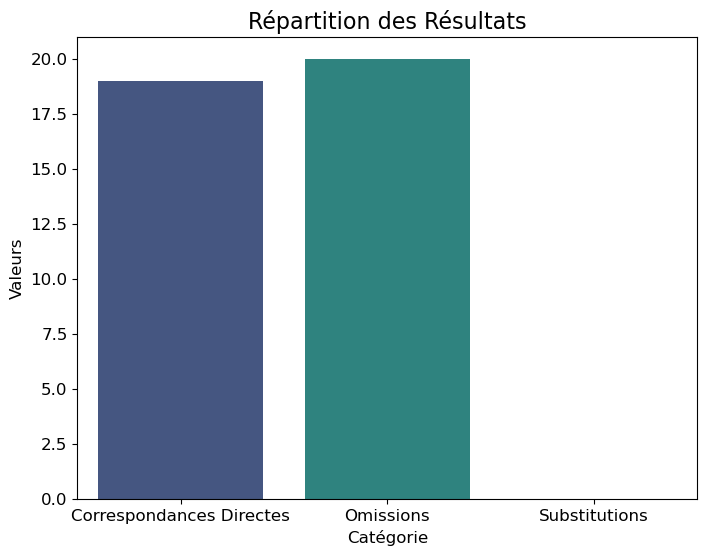

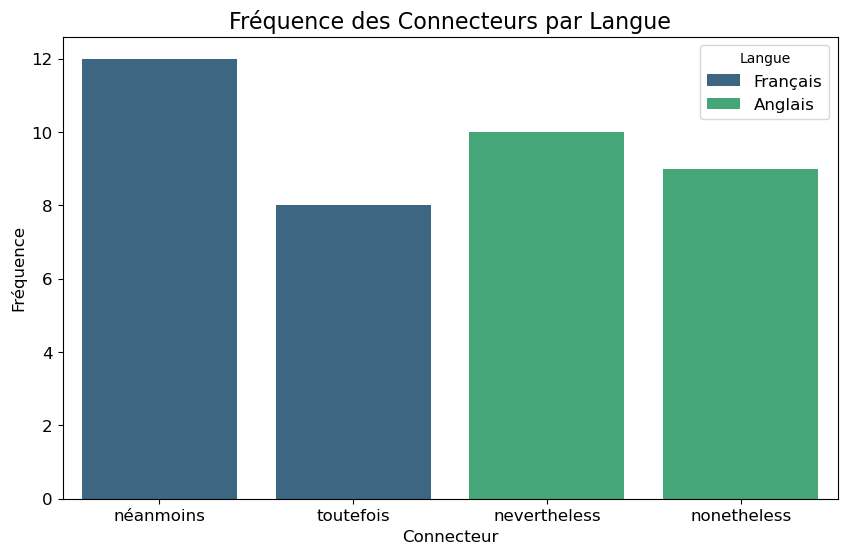

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Données pour les graphiques
resultats = {
    "Correspondances Directes": 19,
    "Omissions": 20,
    "Substitutions": 0
}
freq_connecteurs_fr = {"néanmoins": 12, "toutefois": 8}
freq_connecteurs_en = {"nevertheless": 10, "nonetheless": 9}

# Préparer les données pour Seaborn
data_resultats = pd.DataFrame({
    "Catégorie": list(resultats.keys()),
    "Valeurs": list(resultats.values())
})

data_freq_connecteurs = pd.DataFrame({
    "Langue": ["Français"] * len(freq_connecteurs_fr) + ["Anglais"] * len(freq_connecteurs_en),
    "Connecteur": list(freq_connecteurs_fr.keys()) + list(freq_connecteurs_en.keys()),
    "Fréquence": list(freq_connecteurs_fr.values()) + list(freq_connecteurs_en.values())
})

# Graphique 1 : Répartition des Correspondances, Omissions, et Substitutions
plt.figure(figsize=(8, 6))
sns.barplot(data=data_resultats, x="Catégorie", y="Valeurs", palette="viridis")
plt.title("Répartition des Résultats", fontsize=16)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Valeurs", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Graphique 2 : Fréquence des Connecteurs en Français et Anglais
plt.figure(figsize=(10, 6))
sns.barplot(data=data_freq_connecteurs, x="Connecteur", y="Fréquence", hue="Langue", palette="viridis")
plt.title("Fréquence des Connecteurs par Langue", fontsize=16)
plt.xlabel("Connecteur", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Langue", fontsize=12)
plt.show()